# My 2020 Fitbit Data (so far)

The data I'll be working with is from my personal fitbit, downloaded from their website. This dataset includes everyday this year from January 1st to August 31st.

In addition to my fitbit data I collect some basic data everyday on how my mood is, how much pain I'm in, and how tired I am.

I'm trying to find any relationships there might be, from how many steps I walk in a day, to how my weight fluctuates, to how those might be affecting my mood, pain, or how tired I am. The dataset consists of nearly 250 rows and over a dozen columns of data.

I'll of course be using pandas and the other libraries we've learned so far but I'll play around with the data and maybe try out some things we haven't explored yet.

## Data Preparation and Cleaning

Before any analysis can be done we first have to clean and prepare the data. This means we have to get rid of any columns or rows that might not be necessary or relevant to the analysis or that are repetitive or too incomplete to work with.

For this stage we will: 
* Load the dataset into a data frame using Pandas
* Explore the number of rows & columns, ranges of values etc.
* Handle missing, incorrect and invalid data
* Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [1]:
import pandas as pd

In [2]:
fitbit_df = pd.read_csv('jovianfitbitdata.csv')

# loading the csv file

In [3]:
fitbit_df

# a firstlook at the data

,Date,Weight,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Mood,Pain,Tired
0,2019-12-30,157.0,1865,1595,1.00,0,1402,38,0,0,190,7.0,0.0,0.0
1,2019-12-31,157.0,1930,748,0.35,0,683,66,0,0,216,6.0,1.0,1.0
2,2020-01-01,159.4,1988,1041,0.51,0,1123,79,0,0,267,6.0,0.0,0.0
3,2020-01-02,160.4,1862,321,0.15,0,284,31,0,0,102,6.0,0.0,0.0
4,2020-01-03,158.0,2046,1659,0.78,1,152,60,3,8,291,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2020-08-27,NaN,2257,4014,1.89,1,533,120,12,7,604,7.0,1.0,0.0
242,2020-08-28,160.2,2375,5260,2.50,3,859,170,8,15,797,7.0,1.0,0.0
243,2020-08-29,161.2,2098,2884,1.36,2,927,97,7,7,428,7.0,1.0,0.0
244,2020-08-30,159.6,2944,7273,3.42,4,759,194,31,39,1357,7.0,0.0,0.0


In [4]:
fitbit_df.shape

# the shape of the dataframe, in (rows, columns)

(246, 14)

In [5]:
fitbit_df.info()

# some basic information about the dataframe, such as rowcount, what the headers are, what the datatypes for each series, and even how much memory the dataframe is using. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    246 non-null    object 
 1   Weight                  190 non-null    float64
 2   Calories Burned         246 non-null    int64  
 3   Steps                   246 non-null    int64  
 4   Distance                246 non-null    float64
 5   Floors                  246 non-null    int64  
 6   Minutes Sedentary       246 non-null    int64  
 7   Minutes Lightly Active  246 non-null    int64  
 8   Minutes Fairly Active   246 non-null    int64  
 9   Minutes Very Active     246 non-null    int64  
 10  Activity Calories       246 non-null    int64  
 11  Mood                    240 non-null    float64
 12  Pain                    240 non-null    float64
 13  Tired                   240 non-null    float64
dtypes: float64(5), int64(8), object(1)
memory 

It looks like all of the data types are what what we would expect them to be except the 'Date' column which we'll convert to datetime with pandas after cleaning up the data a little.

In [6]:
fitbit_df.describe()

# some interesting calculations on each series such as mean, minimum value, and maximum value.

,Weight,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Mood,Pain,Tired
count,190.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,240.000000,240.000000,240.000000
mean,161.074737,2479.512195,4952.073171,2.339634,2.552846,751.934959,167.373984,14.162602,13.060976,866.166667,7.095833,0.537500,0.429167
std,1.992922,325.119868,2835.946603,1.340926,2.544953,226.604060,66.847301,16.271610,13.293252,416.008900,0.536515,0.598682,0.536515
min,157.000000,1848.000000,321.000000,0.150000,0.000000,0.000000,31.000000,0.000000,0.000000,102.000000,5.000000,0.000000,0.000000
25%,159.650000,2256.250000,3140.500000,1.447500,1.000000,647.750000,115.000000,2.250000,7.000000,567.000000,7.000000,0.000000,0.000000
50%,161.200000,2447.000000,4554.000000,2.150000,2.000000,739.500000,164.500000,8.000000,10.000000,821.500000,7.000000,0.000000,0.000000
75%,162.400000,2692.500000,7217.250000,3.420000,3.000000,854.000000,223.000000,20.000000,18.000000,1165.250000,7.000000,1.000000,1.000000
max,166.800000,3572.000000,13625.000000,6.420000,26.000000,1402.000000,350.000000,81.000000,94.000000,2107.000000,8.000000,3.000000,2.000000


In [7]:
fitbit_df.columns

Index(['Date', 'Weight', 'Calories Burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'Mood', 'Pain', 'Tired'],
      dtype='object')

In [8]:
fitbit_df.sample(10)

# a random sample from the dataset

,Date,Weight,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Mood,Pain,Tired
55,2020-02-23,160.4,3253,6550,3.03,6,644,254,52,36,1735,8.0,2.0,1.0
63,2020-03-02,161.4,2314,3545,1.67,1,646,107,17,11,660,7.0,0.0,0.0
87,2020-03-26,161.2,2541,3701,1.74,2,448,133,27,15,865,7.0,1.0,0.0
150,2020-05-28,162.2,2872,9273,4.36,4,776,280,18,18,1389,NaN,NaN,NaN
86,2020-03-25,162.6,2240,3817,1.80,1,887,135,3,9,608,7.0,0.0,0.0
207,2020-07-24,162.4,2175,3536,1.66,2,1309,118,7,6,518,7.0,0.0,1.0
121,2020-04-29,NaN,3187,13625,6.42,10,740,240,30,78,1773,6.0,1.0,0.0
222,2020-08-08,160.2,2688,4764,2.25,2,726,172,36,13,1041,7.0,0.0,1.0
119,2020-04-27,159.8,2797,8125,3.82,3,762,249,33,21,1352,8.0,1.0,0.0
141,2020-05-19,163.8,2345,1744,0.81,0,535,124,0,0,540,7.0,1.0,0.0


In [9]:
from IPython.display import display
with pd.option_context('display.max_rows', 250):
    display(fitbit_df)
    
# a more complete view of the dataframe

,Date,Weight,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Mood,Pain,Tired
0,2019-12-30,157.0,1865,1595,1.00,0,1402,38,0,0,190,7.0,0.0,0.0
1,2019-12-31,157.0,1930,748,0.35,0,683,66,0,0,216,6.0,1.0,1.0
2,2020-01-01,159.4,1988,1041,0.51,0,1123,79,0,0,267,6.0,0.0,0.0
3,2020-01-02,160.4,1862,321,0.15,0,284,31,0,0,102,6.0,0.0,0.0
4,2020-01-03,158.0,2046,1659,0.78,1,152,60,3,8,291,7.0,0.0,0.0
5,2020-01-04,159.4,2670,8407,3.96,8,912,255,8,16,1173,6.0,2.0,1.0
6,2020-01-05,158.2,2306,4520,2.17,2,998,165,5,8,690,7.0,2.0,0.0
7,2020-01-06,158.0,2215,3202,1.44,3,861,139,0,0,540,8.0,1.0,0.0
8,2020-01-07,157.2,2206,1542,0.72,0,621,137,0,0,496,8.0,0.0,0.0
9,2020-01-08,157.6,2282,4072,1.92,3,661,109,17,12,628,8.0,0.0,0.0


#### Cleaning up

Luckily it doesn't appear like the fitbit had any trouble recording any data so there isn't much to do for those values. There are several days of my personal weight, mood, pain, and tiredness data that seems to have not gotten recorded so for those 'NaN' values I will instead replace them with the values from the day before, instead of getting rid of those days of data entirely.

In [10]:
fitbit_df = fitbit_df.fillna(method='ffill')

In [11]:
from IPython.display import display
with pd.option_context('display.max_rows', 250):
    display(fitbit_df)

,Date,Weight,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Mood,Pain,Tired
0,2019-12-30,157.0,1865,1595,1.00,0,1402,38,0,0,190,7.0,0.0,0.0
1,2019-12-31,157.0,1930,748,0.35,0,683,66,0,0,216,6.0,1.0,1.0
2,2020-01-01,159.4,1988,1041,0.51,0,1123,79,0,0,267,6.0,0.0,0.0
3,2020-01-02,160.4,1862,321,0.15,0,284,31,0,0,102,6.0,0.0,0.0
4,2020-01-03,158.0,2046,1659,0.78,1,152,60,3,8,291,7.0,0.0,0.0
5,2020-01-04,159.4,2670,8407,3.96,8,912,255,8,16,1173,6.0,2.0,1.0
6,2020-01-05,158.2,2306,4520,2.17,2,998,165,5,8,690,7.0,2.0,0.0
7,2020-01-06,158.0,2215,3202,1.44,3,861,139,0,0,540,8.0,1.0,0.0
8,2020-01-07,157.2,2206,1542,0.72,0,621,137,0,0,496,8.0,0.0,0.0
9,2020-01-08,157.6,2282,4072,1.92,3,661,109,17,12,628,8.0,0.0,0.0


It looks like that was successful and the values in the Mood, Pain, and Tired series, at rows 67, 83, 149, 150, 166, and 168 and all of the values in the Weight series that said 'NaN' were replaced with value from before them and no longer say 'NaN'. 

Now that the values are how they should be we can change the date format so it's easier to work with. After that we should be able to parse through the data easier and see the differences between different days of the week, weeks, or months 

In [12]:
fitbit_df['Date'] = pd.to_datetime(fitbit_df.Date)

In [13]:
fitbit_df['Date']

# This shows that the datatype for the 'Date' series is now datetime64 so we should be able parse through it now

0     2019-12-30
1     2019-12-31
2     2020-01-01
3     2020-01-02
4     2020-01-03
         ...    
241   2020-08-27
242   2020-08-28
243   2020-08-29
244   2020-08-30
245   2020-08-31
Name: Date, Length: 246, dtype: datetime64[ns]

In [14]:
fitbit_df['month'] = pd.DatetimeIndex(fitbit_df.Date).month
fitbit_df['day'] = pd.DatetimeIndex(fitbit_df.Date).day
fitbit_df['weekday'] = pd.DatetimeIndex(fitbit_df.Date).weekday

# I could have added a year category but I'm going to drop those 2 days of data anyways

In [15]:
fitbit_df['month']

0      12
1      12
2       1
3       1
4       1
       ..
241     8
242     8
243     8
244     8
245     8
Name: month, Length: 246, dtype: int64

In [16]:
fitbit_df['day']

0      30
1      31
2       1
3       2
4       3
       ..
241    27
242    28
243    29
244    30
245    31
Name: day, Length: 246, dtype: int64

In [17]:
fitbit_df['weekday']

0      0
1      1
2      2
3      3
4      4
      ..
241    3
242    4
243    5
244    6
245    0
Name: weekday, Length: 246, dtype: int64

In [18]:
fitbit_df

,Date,Weight,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Mood,Pain,Tired,month,day,weekday
0,2019-12-30,157.0,1865,1595,1.00,0,1402,38,0,0,190,7.0,0.0,0.0,12,30,0
1,2019-12-31,157.0,1930,748,0.35,0,683,66,0,0,216,6.0,1.0,1.0,12,31,1
2,2020-01-01,159.4,1988,1041,0.51,0,1123,79,0,0,267,6.0,0.0,0.0,1,1,2
3,2020-01-02,160.4,1862,321,0.15,0,284,31,0,0,102,6.0,0.0,0.0,1,2,3
4,2020-01-03,158.0,2046,1659,0.78,1,152,60,3,8,291,7.0,0.0,0.0,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2020-08-27,159.6,2257,4014,1.89,1,533,120,12,7,604,7.0,1.0,0.0,8,27,3
242,2020-08-28,160.2,2375,5260,2.50,3,859,170,8,15,797,7.0,1.0,0.0,8,28,4
243,2020-08-29,161.2,2098,2884,1.36,2,927,97,7,7,428,7.0,1.0,0.0,8,29,5
244,2020-08-30,159.6,2944,7273,3.42,4,759,194,31,39,1357,7.0,0.0,0.0,8,30,6


Now that we've changed the date to the pandas datetime type we're able to add a 'year', 'month', 'day', and 'weekday' series to the dataframe that we can work with as well. 

Looking back at the data, I don't really want the first rows of data, the last two days of the year 2019, so I'm going to drop them from my dataframe.

In [19]:
fitbit_df.drop(index= [0], inplace=True)
fitbit_df.drop(index=[1], inplace=True)

In [20]:
fitbit_df.head(5)
    
# Now we are just left with the data from 2020

,Date,Weight,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Mood,Pain,Tired,month,day,weekday
2,2020-01-01,159.4,1988,1041,0.51,0,1123,79,0,0,267,6.0,0.0,0.0,1,1,2
3,2020-01-02,160.4,1862,321,0.15,0,284,31,0,0,102,6.0,0.0,0.0,1,2,3
4,2020-01-03,158.0,2046,1659,0.78,1,152,60,3,8,291,7.0,0.0,0.0,1,3,4
5,2020-01-04,159.4,2670,8407,3.96,8,912,255,8,16,1173,6.0,2.0,1.0,1,4,5
6,2020-01-05,158.2,2306,4520,2.17,2,998,165,5,8,690,7.0,2.0,0.0,1,5,6


In [21]:
fitbit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 2 to 245
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    244 non-null    datetime64[ns]
 1   Weight                  244 non-null    float64       
 2   Calories Burned         244 non-null    int64         
 3   Steps                   244 non-null    int64         
 4   Distance                244 non-null    float64       
 5   Floors                  244 non-null    int64         
 6   Minutes Sedentary       244 non-null    int64         
 7   Minutes Lightly Active  244 non-null    int64         
 8   Minutes Fairly Active   244 non-null    int64         
 9   Minutes Very Active     244 non-null    int64         
 10  Activity Calories       244 non-null    int64         
 11  Mood                    244 non-null    float64       
 12  Pain                    244 non-null    float64   

There doesn't appear to be anything else that needs to be changed or added yet for this dataframe so now we can start the exploratory analysis and visualization stage.

## Exploratory Analysis and Visualization

For this stage we will: 
* Compute the mean, sum, range and other interesting statistics for numeric columns
* Explore distributions of numeric columns using histograms etc.
* Explore relationship between columns using scatter plots, bar charts etc.
* Make a note of interesting insights from the exploratory analysis

In [22]:
fitbit_df['Weight'].mean()

# The average I weighed for this year.

161.20491803278688

In [23]:
fitbit_df['Distance'].sum()

# The total distance I've walked this year

574.2

In [24]:
fitbit_df['Steps'].sum()

# The total number of steps I've walked this year. Over 1.2 million so far!

1215867

In [25]:
fitbit_df['Floors'].max()

# The most floors I climbed up in a single day (I think on a stair stepper machine).

26

In [26]:
# to do a basic histogram we have to import some more libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
%matplotlib inline

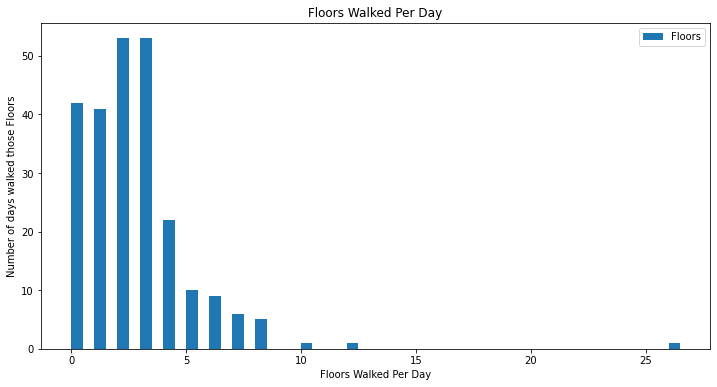

In [27]:
plt.figure(figsize=(12, 6))
plt.title("Floors Walked Per Day")
plt.hist(fitbit_df['Floors'], bins=np.arange(0, 27, 0.5));
plt.xlabel('Floors Walked Per Day')
plt.ylabel('Number of days walked those Floors', )
plt.legend(['Floors']);

In this basic matplotlib histogram we can see that for the most part I walked up and down less than 5 floors per day with most of them being in either the 3 or 4 floors walked per day, though there were a lot of days that I didn't walk up or down any floors at all.

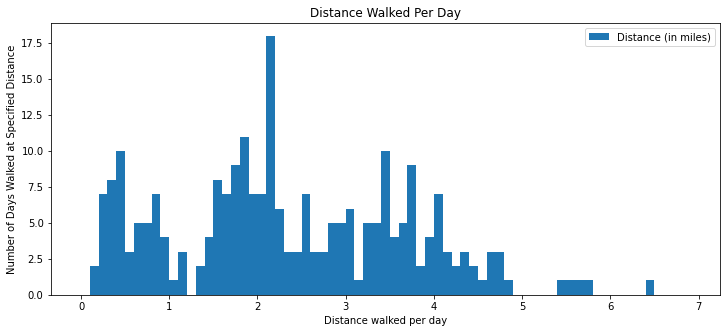

In [92]:
plt.figure(figsize=(12, 5))
plt.title("Distance Walked Per Day")
plt.hist(fitbit_df['Distance'], bins=np.arange(0, 7, 0.1));
plt.ylabel('Number of Days Walked at Specified Distance')
plt.xlabel('Distance walked per day')

plt.legend(['Distance (in miles)']);

These are just some basic calculations that can be performed on numeric data, but I'm more interested in any possible relationships between the different variables I have to work with.

In [29]:
fitbit_df_monthly = pd.DataFrame()
fitbit_df_monthly['Monthly Distance'] = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
fitbit_df_monthly.at[0, 'Monthly Distance'] = fitbit_df[fitbit_df.month == 1][['Distance']].sum()

In [30]:
fitbit_df_monthly.at[1, 'Monthly Distance'] = fitbit_df[fitbit_df.month == 2][['Distance']].sum()

In [31]:
fitbit_df_monthly.at[2, 'Monthly Distance'] = fitbit_df[fitbit_df.month == 3][['Distance']].sum()

In [32]:
fitbit_df_monthly.at[3, 'Monthly Distance'] = fitbit_df[fitbit_df.month == 4][['Distance']].sum()

In [33]:
fitbit_df_monthly.at[4, 'Monthly Distance'] = fitbit_df[fitbit_df.month == 5][['Distance']].sum()

In [34]:
fitbit_df_monthly.at[5, 'Monthly Distance'] = fitbit_df[fitbit_df.month == 6][['Distance']].sum()

In [35]:
fitbit_df_monthly.at[6, 'Monthly Distance'] = fitbit_df[fitbit_df.month == 7][['Distance']].sum()

In [36]:
fitbit_df_monthly.at[7, 'Monthly Distance'] = fitbit_df[fitbit_df.month == 8][['Distance']].sum()

In [37]:
fitbit_df_monthly

,Monthly Distance
0,63.67
1,72.67
2,81.26
3,74.83
4,70.26
5,72.49
6,72.74
7,66.28


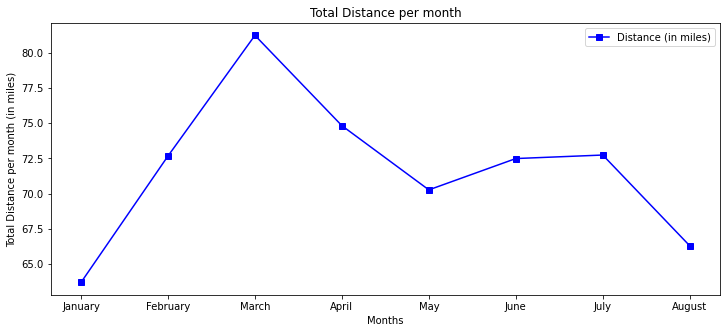

In [93]:
plt.figure(figsize=(12, 5))
plt.plot(fitbit_df_monthly['Monthly Distance'], 's-b')

plt.xlabel('Months')
plt.ylabel('Total Distance per month (in miles)')

plt.title("Total Distance per month")
plt.xticks([0, 1, 2,3,4,5,6,7], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'])

plt.legend(['Distance (in miles)']);

Here we have a graph of the total distance I walked each month this year. It appears that I walked the least in January and the most in March (so far).

In [39]:
fitbit_df_weekday = pd.DataFrame()

In [40]:
fitbit_df_weekday['Weekday Average Sedentary'] = [0.0,1.0,2.0,3.0,4.0,5.0,6.0]

In [41]:
fitbit_df_weekday.at[0, 'Weekday Average Sedentary'] = fitbit_df[fitbit_df.weekday == 0][['Minutes Sedentary']].mean()

#monday

In [42]:
fitbit_df_weekday.at[1, 'Weekday Average Sedentary'] = fitbit_df[fitbit_df.weekday == 1][['Minutes Sedentary']].mean()

#tuesday

In [43]:
fitbit_df_weekday.at[2, 'Weekday Average Sedentary'] = fitbit_df[fitbit_df.weekday == 2][['Minutes Sedentary']].mean()

#wednesday

In [44]:
fitbit_df_weekday.at[3, 'Weekday Average Sedentary'] = fitbit_df[fitbit_df.weekday == 3][['Minutes Sedentary']].mean()

#thursday

In [45]:
fitbit_df_weekday.at[4, 'Weekday Average Sedentary'] = fitbit_df[fitbit_df.weekday == 4][['Minutes Sedentary']].mean()

#friday

In [46]:
fitbit_df_weekday.at[5, 'Weekday Average Sedentary'] = fitbit_df[fitbit_df.weekday == 5][['Minutes Sedentary']].mean()

#saturday

In [47]:
fitbit_df_weekday.at[6, 'Weekday Average Sedentary'] = fitbit_df[fitbit_df.weekday == 6][['Minutes Sedentary']].mean()

#sunday

In [48]:
fitbit_df_weekday

,Weekday Average Sedentary
0,729.828571
1,700.264706
2,758.228571
3,746.314286
4,758.600000
5,808.000000
6,744.228571


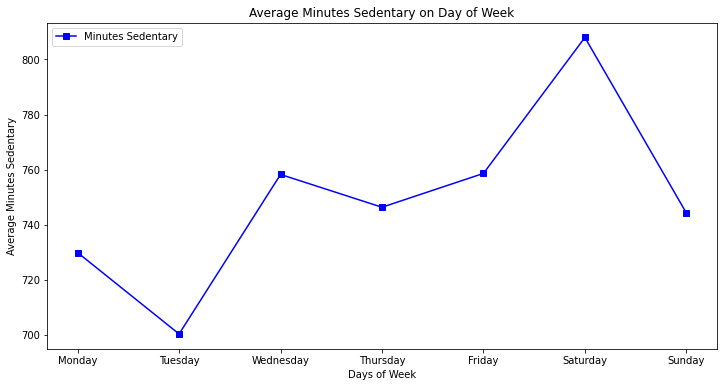

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(fitbit_df_weekday['Weekday Average Sedentary'], 's-b')

plt.xlabel('Days of Week')
plt.ylabel('Average Minutes Sedentary')

plt.title("Average Minutes Sedentary on Day of Week")
plt.xticks([0, 1, 2,3,4,5,6,], ['Monday', 'Tuesday', "Wednesday", 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.legend(['Minutes Sedentary']);

Here we can see that as the week progresses, I (generally) become more sedentary. Seemingly more active on Sunday, Monday, Tuesday, and less on Wednesday, Thursday, Friday, until I'm the most sedentary on Saturdays.

In [50]:
fitbit_df_weekday['Weekday Average Mood'] = [0.0,1.0,2.0,3.0,4.0,5.0,6.0]

In [51]:
fitbit_df_weekday.at[0, 'Weekday Average Mood'] = fitbit_df[fitbit_df.weekday == 0][['Mood']].mean()

#monday

In [52]:
fitbit_df_weekday.at[1, 'Weekday Average Mood'] = fitbit_df[fitbit_df.weekday == 1][['Mood']].mean()

#tuesday

In [53]:
fitbit_df_weekday.at[2, 'Weekday Average Mood'] = fitbit_df[fitbit_df.weekday == 2][['Mood']].mean()

#wednesday

In [54]:
fitbit_df_weekday.at[3, 'Weekday Average Mood'] = fitbit_df[fitbit_df.weekday == 3][['Mood']].mean()

#thursday

In [55]:
fitbit_df_weekday.at[4, 'Weekday Average Mood'] = fitbit_df[fitbit_df.weekday == 4][['Mood']].mean()

#friday

In [56]:
fitbit_df_weekday.at[5, 'Weekday Average Mood'] = fitbit_df[fitbit_df.weekday == 5][['Mood']].mean()

#saturday

In [57]:
fitbit_df_weekday.at[6, 'Weekday Average Mood'] = fitbit_df[fitbit_df.weekday == 6][['Mood']].mean()

#sunday

In [58]:
fitbit_df_weekday['Weekday Average Mood']

0    7.142857
1    7.176471
2    6.942857
3    6.914286
4    7.142857
5    7.142857
6    7.171429
Name: Weekday Average Mood, dtype: float64

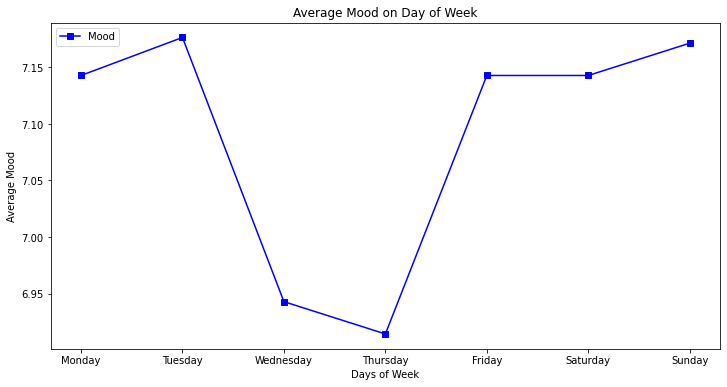

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(fitbit_df_weekday['Weekday Average Mood'], 's-b')

plt.xlabel('Days of Week')
plt.ylabel('Average Mood')

plt.title("Average Mood on Day of Week")
plt.xticks([0, 1, 2,3,4,5,6,], ['Monday', 'Tuesday', "Wednesday", 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.legend(['Mood']);

This is a pretty interesting chart as well. It looks like most of the time I'm happier than average, but apparently on Wednesday's and Thursday's I'm more likely to be in a worse mood. There isn't anything that comes to mind that would make this happen since my work schedule isn't very structured, so every week looks different. Worth looking into why this may happen though.

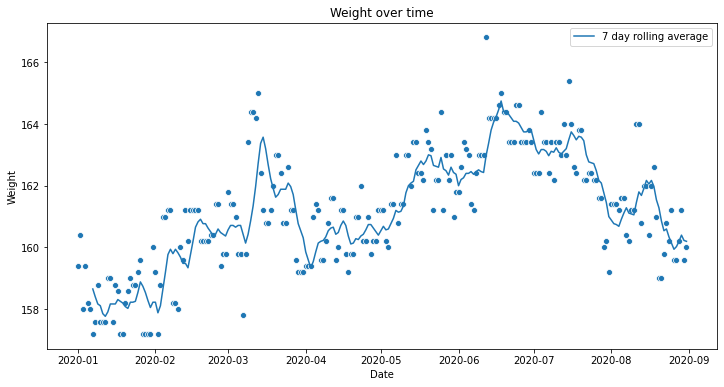

In [60]:
plt.figure(figsize=(12, 6))
plt.title('Weight over time')
plt.xlabel('Date')
plt.xticks()
plt.ylabel('Weight (in pounds)')
sns.scatterplot(fitbit_df['Date'], fitbit_df['Weight']);
plt.plot(fitbit_df['Date'], fitbit_df['Weight'].rolling(7).mean(),label= '7 day rolling average');
plt.legend(['7 day rolling average']);

Here we have my weight and how it has changed over the year. Looks like it's coming back down after being up nearly 10 pounds at one point in June

## Asking and Answering Questions

For this section we will:
* Ask at least 4 interesting questions about your dataset
* Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
* Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
* Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does

What I'm most interested in is the relationship between how my physical activity affects my mood (or vice versa). First we have to see how my mood changes over time.

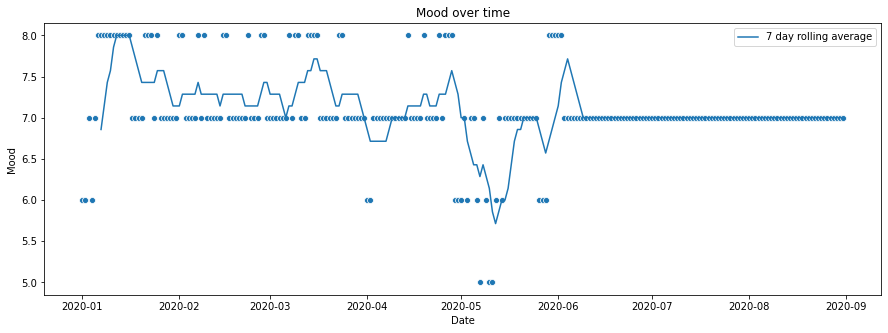

In [88]:
plt.figure(figsize=(15, 5))
plt.title('Mood over time')
plt.xlabel('Date')
plt.xticks()
plt.ylabel('Mood (from 0 to 10)')
sns.scatterplot(fitbit_df['Date'], fitbit_df['Mood']);
plt.plot(fitbit_df['Date'], fitbit_df['Mood'].rolling(7).mean(),label= '7 day rolling average');
plt.legend(['7 day rolling average']);

It looks like my mood is actually pretty steady, mostly ranging between 6 and 8 out of 10 with the average being about 7 out 10 on any given day. A 10/10 mood would be the best mood I've ever had and 0 would be the worst. I default to a 7 out of 10 and would say that's my baseline.

But how does this correlate with my physical activity?

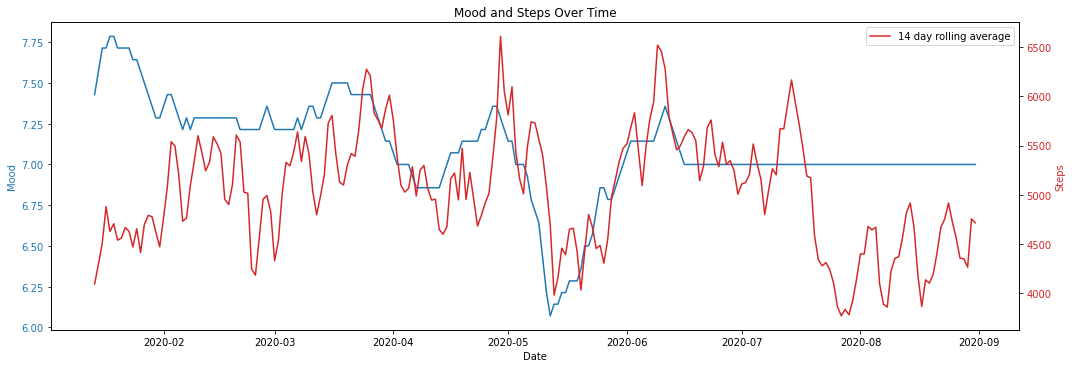

In [89]:
t = fitbit_df['Date']
data1 = fitbit_df['Mood'].rolling(14).mean()
data2 = fitbit_df['Steps'].rolling(14).mean()

fig, ax1 = plt.subplots(figsize=(15, 5))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Mood', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Steps', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Mood and Steps Over Time')
plt.legend(['14 day rolling average']);
plt.show()

There appears to be some correlation here but it's hard to tell on this graph. We can try to do some correlation coefficient calculations to see whether there is any significance here or not.

In [63]:
fitbit_df['Mood'].corr(fitbit_df['Steps'], method='pearson')

0.1607810791577772

This shows there is a positive correlation between my mood and steps walked in day (though not as strongly as I would have guessed). It appears that as my steps increase, then my mood does as well (Though it could just as well be that when I am in a better mood that I walk more too). But is this statistically significant? First we'll see what other correlations there are between each series.

In [64]:
fitbit_df.corr(method='pearson')

# correlations between each series

,Weight,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Mood,Pain,Tired,month,day,weekday
Weight,1.000000,0.035081,-0.008298,-0.008506,-0.045956,-0.047191,-0.001086,0.077819,-0.056510,0.021074,-0.229066,0.050079,0.107660,0.554570,-0.025213,-0.052743
Calories Burned,0.035081,1.000000,0.862547,0.860365,0.631112,-0.058582,0.859072,0.724724,0.737281,0.989974,0.203470,-0.020785,0.146809,0.002023,0.013865,0.128821
Steps,-0.008298,0.862547,1.000000,0.999047,0.671323,0.014433,0.863622,0.550497,0.683626,0.907400,0.160781,-0.040727,0.191964,-0.021368,0.041831,0.129670
Distance,-0.008506,0.860365,0.999047,1.000000,0.672311,0.016381,0.860753,0.542636,0.686377,0.904424,0.161165,-0.044307,0.188363,-0.020780,0.042247,0.137606
Floors,-0.045956,0.631112,0.671323,0.672311,1.000000,0.012746,0.507743,0.419481,0.680731,0.632673,0.133691,-0.017845,0.165190,-0.083828,-0.034816,0.114461
Minutes Sedentary,-0.047191,-0.058582,0.014433,0.016381,0.012746,1.000000,0.056827,-0.164788,-0.032586,-0.036455,-0.041934,-0.101963,0.226521,0.000754,-0.006304,0.082347
Minutes Lightly Active,-0.001086,0.859072,0.863622,0.860753,0.507743,0.056827,1.000000,0.405627,0.419528,0.895033,0.190728,-0.019340,0.205420,-0.008047,0.003191,0.121825
Minutes Fairly Active,0.077819,0.724724,0.550497,0.542636,0.419481,-0.164788,0.405627,1.000000,0.610615,0.713569,0.115731,-0.037155,0.012604,0.044233,0.008109,0.081499
Minutes Very Active,-0.056510,0.737281,0.683626,0.686377,0.680731,-0.032586,0.419528,0.610615,1.000000,0.720694,0.133959,-0.011245,0.067194,-0.061492,0.073317,0.097099
Activity Calories,0.021074,0.989974,0.907400,0.904424,0.632673,-0.036455,0.895033,0.713569,0.720694,1.000000,0.198964,-0.023197,0.155543,-0.004023,0.016789,0.128845


In [65]:
from scipy.stats import pearsonr
import numpy as np
rho = fitbit_df.corr().round(3)
pval = fitbit_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))
rho.astype(str) + p

,Weight,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Mood,Pain,Tired,month,day,weekday
Weight,1.0***,0.035,-0.008,-0.009,-0.046,-0.047,-0.001,0.078,-0.057,0.021,-0.229***,0.05,0.108,0.555***,-0.025,-0.053
Calories Burned,0.035,1.0***,0.863***,0.86***,0.631***,-0.059,0.859***,0.725***,0.737***,0.99***,0.203**,-0.021,0.147*,0.002,0.014,0.129*
Steps,-0.008,0.863***,1.0***,0.999***,0.671***,0.014,0.864***,0.55***,0.684***,0.907***,0.161*,-0.041,0.192**,-0.021,0.042,0.13*
Distance,-0.009,0.86***,0.999***,1.0***,0.672***,0.016,0.861***,0.543***,0.686***,0.904***,0.161*,-0.044,0.188**,-0.021,0.042,0.138*
Floors,-0.046,0.631***,0.671***,0.672***,1.0***,0.013,0.508***,0.419***,0.681***,0.633***,0.134*,-0.018,0.165**,-0.084,-0.035,0.114
Minutes Sedentary,-0.047,-0.059,0.014,0.016,0.013,1.0***,0.057,-0.165**,-0.033,-0.036,-0.042,-0.102,0.227***,0.001,-0.006,0.082
Minutes Lightly Active,-0.001,0.859***,0.864***,0.861***,0.508***,0.057,1.0***,0.406***,0.42***,0.895***,0.191**,-0.019,0.205**,-0.008,0.003,0.122
Minutes Fairly Active,0.078,0.725***,0.55***,0.543***,0.419***,-0.165**,0.406***,1.0***,0.611***,0.714***,0.116,-0.037,0.013,0.044,0.008,0.081
Minutes Very Active,-0.057,0.737***,0.684***,0.686***,0.681***,-0.033,0.42***,0.611***,1.0***,0.721***,0.134*,-0.011,0.067,-0.061,0.073,0.097
Activity Calories,0.021,0.99***,0.907***,0.904***,0.633***,-0.036,0.895***,0.714***,0.721***,1.0***,0.199**,-0.023,0.156*,-0.004,0.017,0.129*


This function is from the scipy library. A library for doing statistical work. We import the pearson r correlation coefficient which shows us the statistical significance of a correlation, i.e. how closely related the lines of best fit are to eachother. Then we basically concatenate one, two, or three, '*' (asterisks), on the end to show how statistically significant the correlations are.

This is probably the most interesting piece of information about all of the data I have collected. This table shows the correlation and the statistical significance between every variable against one another. A p-value of < 0.05 returns a single asterisk and a p-value of < 0.01 and 0.001 return a second or third asterisk. 

This shows all of the values that may be worth exploring. This data table is probably the most interesting point of information that I can explore. I can still compare many of the series against one another graphically like above but this has most of what you would want to know and has the best chance of providing me with the information to improve my mood or whatever else I might want to change. 

It appears that one of the more closely related correlations is how tired I am vs my mood (though only -0.236, despite it having a p-value of < 0.001). This would suggest that as my Tiredness goes up, my mood goes down. Let's examine that chart after showing the plain Tiredness chart (which is ranked out of 4, with 0 being not tired at all, 1 being mildly, 2 being moderately, 3 being severely, and 4 being incapacitatingly).

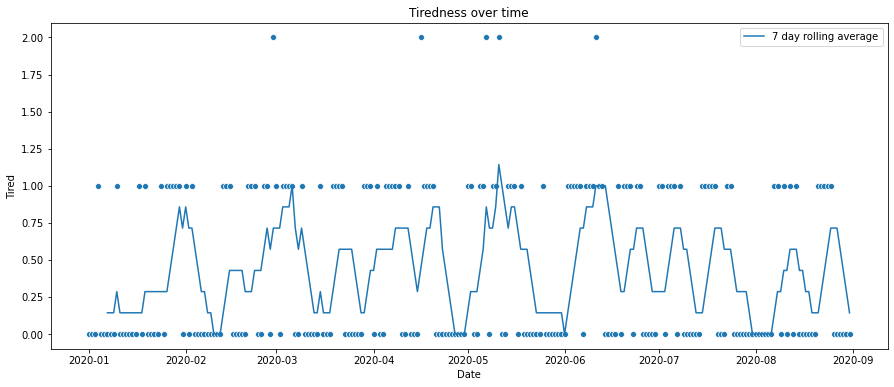

In [66]:
plt.figure(figsize=(15, 6))
plt.title('Tiredness over time')
plt.xlabel('Date')
plt.xticks()
plt.ylabel('Tiredness (from 0 to 4)')
sns.scatterplot(fitbit_df['Date'], fitbit_df['Tired']);
plt.plot(fitbit_df['Date'], fitbit_df['Tired'].rolling(7).mean(),label= '7 day rolling average');
plt.legend(['7 day rolling average']);

In [67]:
fitbit_df['Tired'].mean()

0.430327868852459

We can see that my average tiredness for the whole year was about 0.43 out of 4 on any given day. I was not even halfway to mildly tired on average, basically not tired. There were a few days of moderately tired in there and I apparently haven't had any experiences with severe tiredness this year. For the most part I am apparently not very tired. 

But how does this compare to my mood? Does one affect the other?

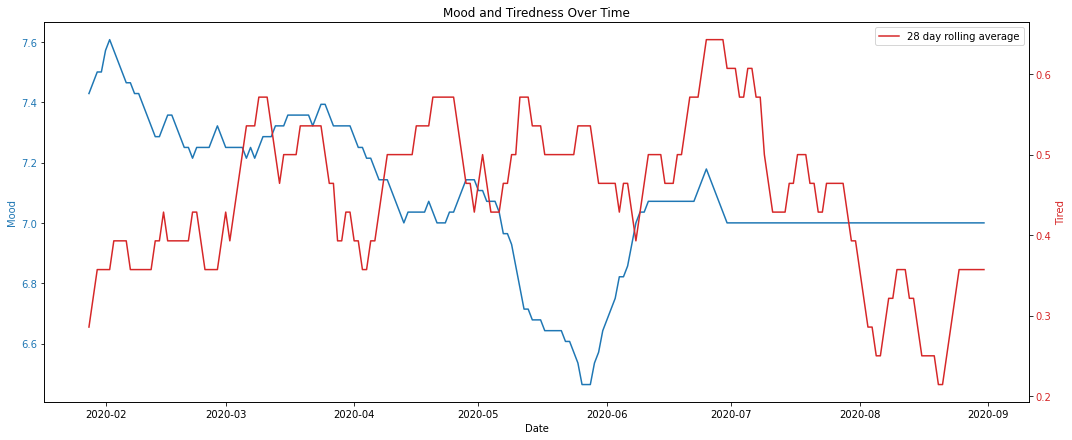

In [68]:
t = fitbit_df['Date']
data1 = fitbit_df['Mood'].rolling(28).mean()
data2 = fitbit_df['Tired'].rolling(28).mean()

fig, ax1 = plt.subplots(figsize=(15, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Mood', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Tired', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Mood and Tiredness Over Time')

plt.legend(['28 day rolling average']);
plt.show()

In [69]:
fitbit_df['Mood'].mean()

7.090163934426229

As we can see there is a (mildly) negative relationship here. This shows a rolling average of both my mood and how tired I am. As Tiredness goes up, my mood goes down. It's most easily seen in the beginning of May where we can see that as my Tiredness spikes up my mood spikes down. This is a correlation though, so we can't definitively say which one came first or whether or not there is a third variable that may be affecting both of them.

Additionally, we can see my average mood for the year so far has been about 7.09 out of 10. This is slightly better than my own arbitrarily defined default/average. I have slightly more good days than bad though the majority are average.

To see some more closely tied relationships we can show how the various activity variables relate to one another.

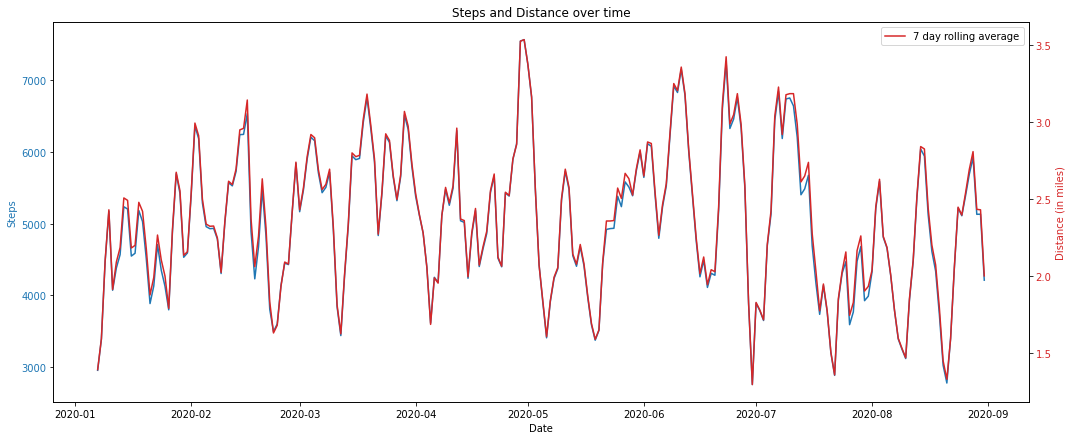

In [70]:
t = fitbit_df['Date']
data1 = fitbit_df['Steps'].rolling(7).mean()
data2 = fitbit_df['Distance'].rolling(7).mean()

fig, ax1 = plt.subplots(figsize=(15, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Steps', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Distance (in miles)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Steps and Distance over time')
plt.legend(['7 day rolling average']);
plt.show()

As we can see, Steps and Distance are nearly perfectly aligned, which makes sense. They indeed are 99.9% correlated with a p-value of less than 0.001. I'm not even sure how they aren't exactly perfect. Perhaps there were strange anomalies where I take very small steps that don't contribute to the distance I travel. I'm not entirely sure. 

How about Steps vs Floors?

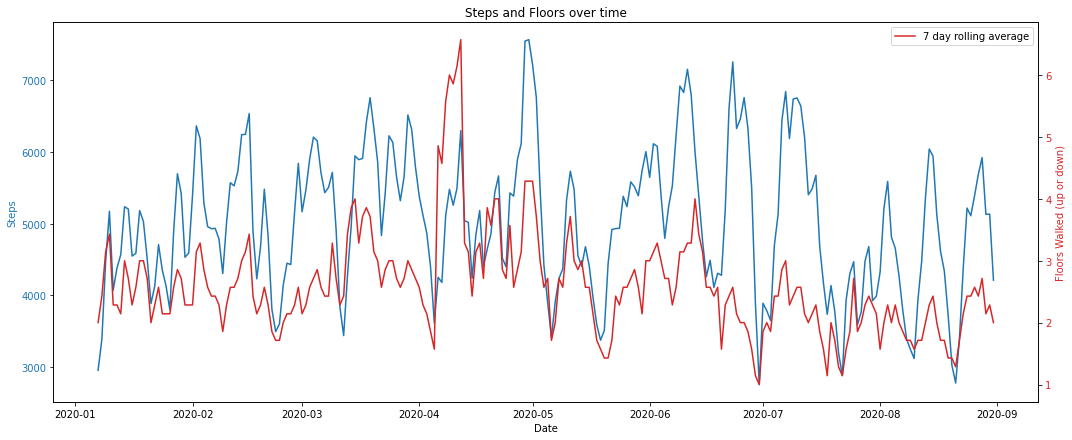

In [71]:
t = fitbit_df['Date']
data1 = fitbit_df['Steps'].rolling(7).mean()
data2 = fitbit_df['Floors'].rolling(7).mean()

fig, ax1 = plt.subplots(figsize=(15, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Steps', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Floors Walked (up or down)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Steps and Floors over time')
plt.legend(['7 day rolling average']);
plt.show()

These are clearly related too, though not quite as pronounced as before. Steps walked and floors climbed (up or down) are correlated only 0.671 though it has a a p-value of < 0.001 which is very significant. There is clearly a relationship here though only by about 2/3rds. As my steps goes up my likelihood of walking up or down stairs also rises, though not perfectly. If I walk on any given day then I have about a 2 in 3 chance of walking up or down at least one flight of stairs. We saw earlier from the Floors histogram that the vast majority of the time I walk up and down less than 4 flights of stairs per day. 

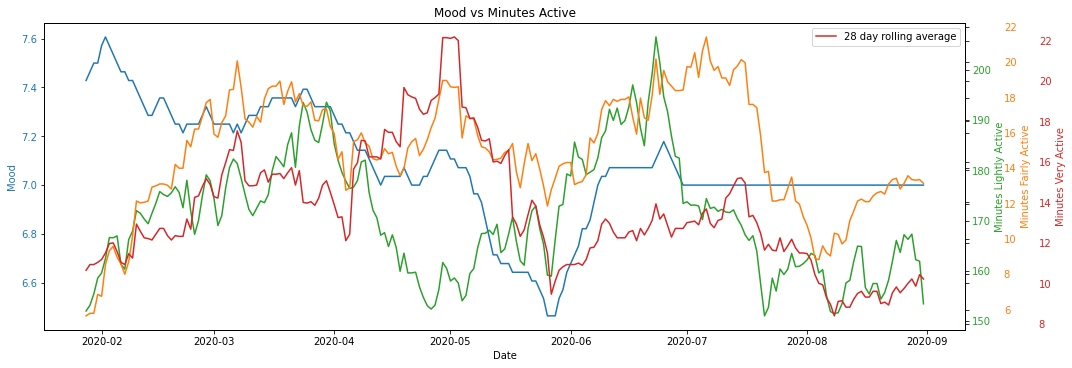

In [90]:
t = fitbit_df['Date']
data = fitbit_df['Mood'].rolling(28).mean()
data1 = fitbit_df['Minutes Lightly Active'].rolling(28).mean()
data2 = fitbit_df['Minutes Fairly Active'].rolling(28).mean()
data3 = fitbit_df['Minutes Very Active'].rolling(28).mean()

fig, ax1 = plt.subplots(figsize=(15, 5))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Mood', color=color)
ax1.plot(t, data, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Minutes Lightly Active', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data1, color=color)
ax2.tick_params(axis='y', labelcolor=color, )

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax3.set_ylabel('Minutes Fairly Active', color=color)  # we already handled the x-label with ax1
ax3.plot(t, data2, color=color)
ax3.tick_params(axis='y', labelcolor=color, pad=35)

ax4 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax4.set_ylabel('Minutes Very Active', color=color)  # we already handled the x-label with ax1
ax4.plot(t, data3, color=color)
ax4.tick_params(axis='y', labelcolor=color, pad=70)

fig.tight_layout()
plt.title('Mood vs Minutes Active')
plt.legend(['28 day rolling average']);
plt.show()

While this chart is a little harder to read, we can see here that as my mood increases or decreases then, generally, how active I am increases or decreases with it. This may have been expected since the various 'Minutes Active' categories are very correlated with number of steps and we saw that was correlated with mood as well. 

Again, which one is affecting the other? We don't really know.

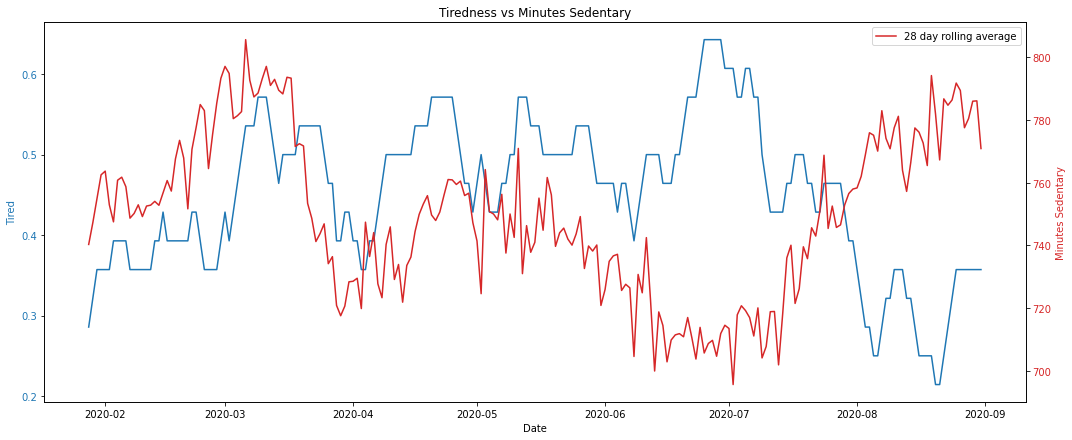

In [73]:
t = fitbit_df['Date']
data1 = fitbit_df['Tired'].rolling(28).mean()
data2 = fitbit_df['Minutes Sedentary'].rolling(28).mean()

fig, ax1 = plt.subplots(figsize=(15, 6))

color = 'tab:blue'

ax1.set_xlabel('Date')
ax1.set_ylabel('Tired', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Minutes Sedentary', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Tiredness vs Minutes Sedentary')
plt.legend(['28 day rolling average']);
plt.show()

Here we have a chart of how tired I am compared to how many minutes I was sedentary in a day. There is a positive 0.277 correlation with a p-value of less than 0.001, so though the relationship is significant, they only mildly play a factor in one another. 

As my Tiredness goes up my minutes sedentary goes up as well. This makes sense as I generally don't feel like being very active if I am tired. Though it could just as well be that when I spend more time staying put, I makes me more tired.

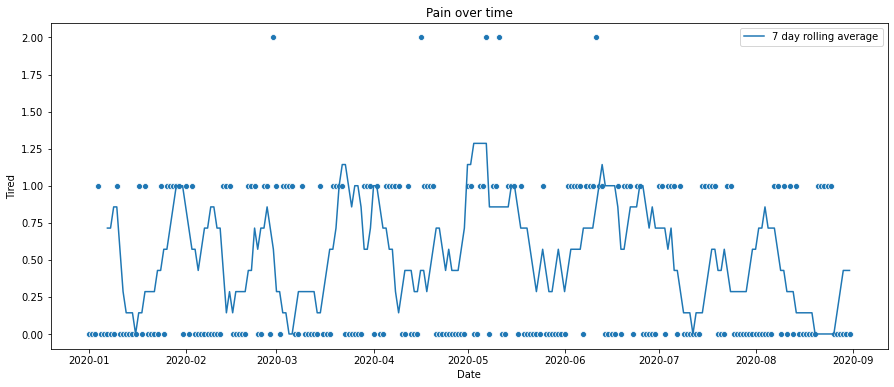

In [74]:
plt.figure(figsize=(15, 6))
plt.title('Pain over time')
plt.xlabel('Date')
plt.xticks()
plt.ylabel('Pain (from 0 to 10)')
sns.scatterplot(fitbit_df['Date'], fitbit_df['Tired']);
plt.plot(fitbit_df['Date'], fitbit_df['Pain'].rolling(7).mean(),label= '7 day rolling average');
plt.legend(['7 day rolling average']);

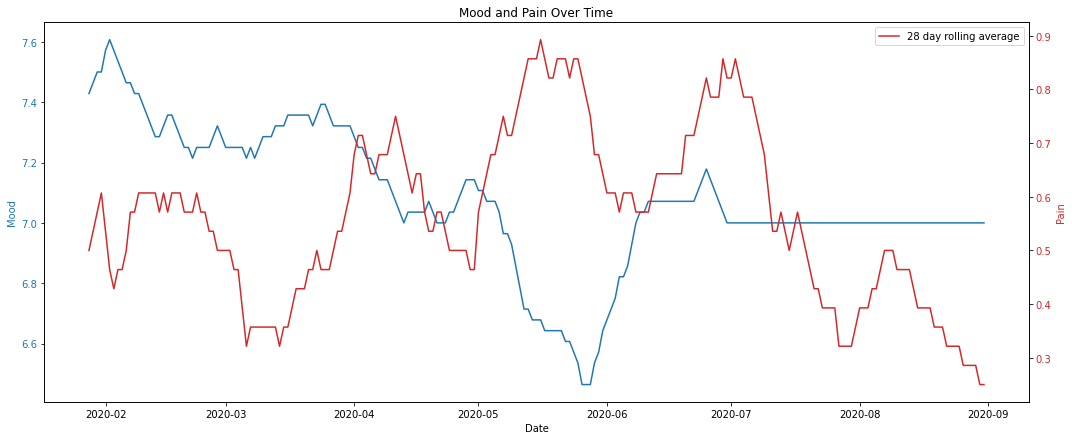

In [75]:
t = fitbit_df['Date']
data1 = fitbit_df['Mood'].rolling(28).mean()
data2 = fitbit_df['Pain'].rolling(28).mean()

fig, ax1 = plt.subplots(figsize=(15, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Mood', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Pain', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Mood and Pain Over Time')
plt.legend(['28 day rolling average']);
plt.show()

Here we have a chart of both my mood and my pain over time. There is a significant relationship between pain and my mood as well, though only -0.149 with a p-value of less than 0.05. So as my pain goes up, then my mood goes down. Pretty intuitive, but statistically significant.

## Inferences and Conclusion

For this section we will:
* Write a summary of what we've learned from the analysis
* Include interesting insights and graphs from previous sections
* Share ideas for future work on the same topic using other relevant datasets
* Share links to resources we've found useful during your analysis

I've learned a lot about not just myself through my fitbit data, but also how to program better and do some basic data analysis. In the beginning I manipulated some dataframes in pandas and found out some basic information from them, parsed through them, and found some interesting insights into them.

I transformed some of the data, such as the dates series into the datetime data type with the pd.to_datetime function from the pandas library, and added new columns to work with from that data such as the months, weeks, days, and weekday columns.

I made several different types of charts such as histrograms, scatterplots, and linecharts from many different columns.

I found out that there is a statistically significant relationship between my fitness level and my mood. 

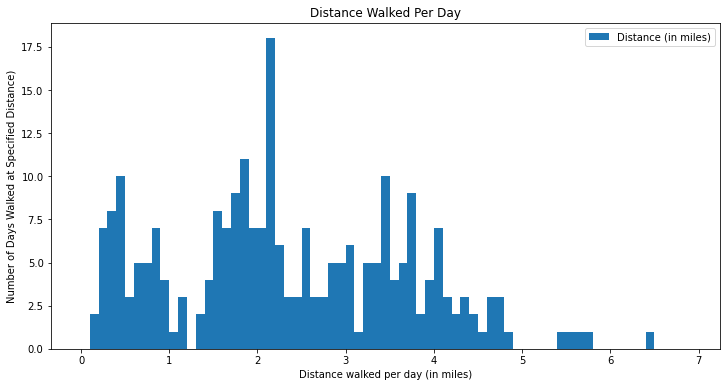

In [76]:
plt.figure(figsize=(12, 6))
plt.title("Distance Walked Per Day")
plt.hist(fitbit_df['Distance'], bins=np.arange(0, 7, 0.1));
plt.ylabel('Number of Days Walked at Specified Distance)')
plt.xlabel('Distance walked per day (in miles)')

plt.legend(['Distance (in miles)']);

This was a histogram of the distance I've walked per day and the number of days I've walked that distance. The most frequent distance walked in a day (the mode in other words) seems to be about 2.2 miles.

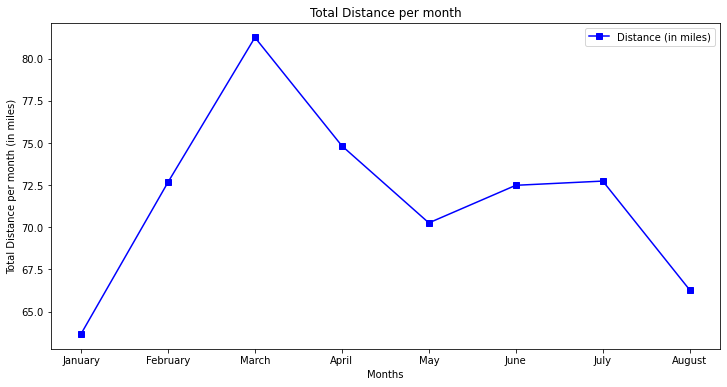

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(fitbit_df_monthly, 's-b')

plt.xlabel('Months')
plt.ylabel('Total Distance per month (in miles)')

plt.title("Total Distance per month")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'])

plt.legend(['Distance (in miles)']);

Here we have the total distance walked each month. I start off in January walking the least distance at just 62.5 miles that month. This could be because it was still winter. The most was over 80 miles in March. It seems to trail off from there. I'll have to see what the rest of the year is before making an assessment on total distance for the whole.

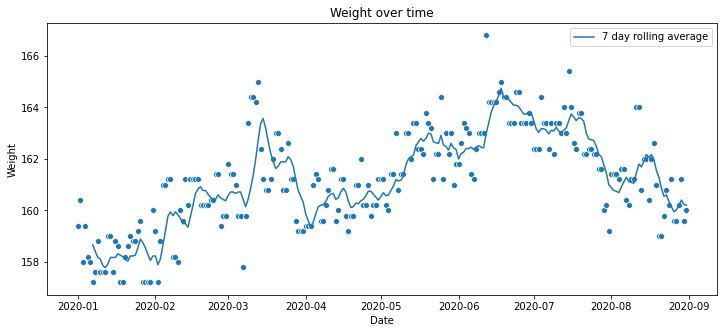

In [91]:
plt.figure(figsize=(12, 5))
plt.title('Weight over time')
plt.xlabel('Date')
plt.xticks()
plt.ylabel('Weight (in pounds)')
sns.scatterplot(fitbit_df['Date'], fitbit_df['Weight']);
plt.plot(fitbit_df['Date'], fitbit_df['Weight'].rolling(7).mean(),label= '7 day rolling average');
plt.legend(['7 day rolling average']);

Here we have a scatterplot of my weight over time and a rolling 7 day average as a line of best fit. It looks like it fluctuates quite a bit, from 157 up to nearly 168. It gradually went up throughout the year until eventually coming back down starting in July. 

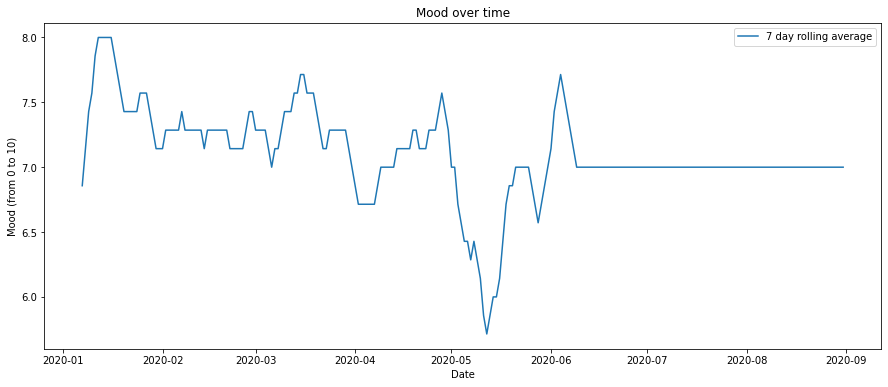

In [79]:
plt.figure(figsize=(15, 6))
plt.title('Mood over time')
plt.xlabel('Date')
plt.xticks()
plt.ylabel('Mood (from 0 to 10)')
plt.plot(fitbit_df['Date'], fitbit_df['Mood'].rolling(7).mean(),label= '7 day rolling average');
plt.legend(['7 day rolling average']);

Here we have my plain mood over time. It starts off higher then comes down several times through the year until staying much steadier starting in June.

In [80]:
rho.astype(str) + p

,Weight,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Mood,Pain,Tired,month,day,weekday
Weight,1.0***,0.035,-0.008,-0.009,-0.046,-0.047,-0.001,0.078,-0.057,0.021,-0.229***,0.05,0.108,0.555***,-0.025,-0.053
Calories Burned,0.035,1.0***,0.863***,0.86***,0.631***,-0.059,0.859***,0.725***,0.737***,0.99***,0.203**,-0.021,0.147*,0.002,0.014,0.129*
Steps,-0.008,0.863***,1.0***,0.999***,0.671***,0.014,0.864***,0.55***,0.684***,0.907***,0.161*,-0.041,0.192**,-0.021,0.042,0.13*
Distance,-0.009,0.86***,0.999***,1.0***,0.672***,0.016,0.861***,0.543***,0.686***,0.904***,0.161*,-0.044,0.188**,-0.021,0.042,0.138*
Floors,-0.046,0.631***,0.671***,0.672***,1.0***,0.013,0.508***,0.419***,0.681***,0.633***,0.134*,-0.018,0.165**,-0.084,-0.035,0.114
Minutes Sedentary,-0.047,-0.059,0.014,0.016,0.013,1.0***,0.057,-0.165**,-0.033,-0.036,-0.042,-0.102,0.227***,0.001,-0.006,0.082
Minutes Lightly Active,-0.001,0.859***,0.864***,0.861***,0.508***,0.057,1.0***,0.406***,0.42***,0.895***,0.191**,-0.019,0.205**,-0.008,0.003,0.122
Minutes Fairly Active,0.078,0.725***,0.55***,0.543***,0.419***,-0.165**,0.406***,1.0***,0.611***,0.714***,0.116,-0.037,0.013,0.044,0.008,0.081
Minutes Very Active,-0.057,0.737***,0.684***,0.686***,0.681***,-0.033,0.42***,0.611***,1.0***,0.721***,0.134*,-0.011,0.067,-0.061,0.073,0.097
Activity Calories,0.021,0.99***,0.907***,0.904***,0.633***,-0.036,0.895***,0.714***,0.721***,1.0***,0.199**,-0.023,0.156*,-0.004,0.017,0.129*


Here we have my favorite piece of information that I discovered about the dataset. The correlations and pearson r (of < 0.05, 0.01, and 0.001) of every variable that I collected from my fitbit and from my own personal data collection set.

This shows the relationship strength and whether or not it was a significantly related as well, the dependence and variability of one variable on another, whether when you change one, how much you will likely change the other.

Mot of the physical activity variables are very related to eachother, i.e. how much I walk in a day vs how many floors I climb that day but there are also significant relationships between how much pain I'm in or how tired I am and my mood as well.

## Future Work

I of course want to do more with this data and I'm still collecting more, not only of these datasets but others, including sleep, other mood categories, and even whether I shaved that day or not. I want to fill out more monthly, weekly, and day of week charts as well to get a clearer picture.

There are probably other people's data I could work with as well, compare my fitbit against other people's, but I'm more interested in my own and how I can improve myself.

## References

Here's where I found my fitbit data to download a csv: 
https://help.fitbit.com/articles/en_US/Help_article/1133.htm

I also have a personal csv that I fill out (almost) everyday that I added to this data with my mood, pain, and tiredness information. I had to clean up and rearrange that csv some before making a master csv with all the information you see in the jovianfitbitdata.csv.

I had to use a lot of outside information to figure out how to do a hundred different things with this dataset to get the information out of it that I wanted, or how to setup and style the different charts. 

Here are most of the places that I gathered information from:

https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-3-numerical-computing-with-numpy
https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-4-analyzing-tabular-data-with-pandas
https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-5-data-visualization-with-matplotlib-and-seaborn

Pandas Basics (describe, mean, sum, etc.):

* https://pandas.pydata.org/pandas-docs/version/0.20.2/basics.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html # What you can do on Series
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html # Fill missing data
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html#pandas.Series.mean # Mean

How to get multiple axes on the same chart:

* https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/secondary_axis.html

How to change the scales on the second axis:

* https://matplotlib.org/gallery/api/two_scales.html
* https://matplotlib.org/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py

How to get the correlation coefficent of a dataframe in pandas:

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

How to get the pearson r of a correlation:

* https://stackoverflow.com/questions/52741236/how-to-calculate-p-values-for-pairwise-correlation-of-columns-in-pandas
* https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance # Most important
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

How to specify the colors in a chart:

* https://matplotlib.org/3.1.1/tutorials/colors/colors.html

How to change tick parameters:

* https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.tick_params.html
* https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html

This is most of the things I found useful while googling.

In [81]:
project_name = "2020fitbit-data-project"

In [82]:
!pip install jovian --upgrade -q

In [83]:
import jovian

In [84]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "mcwaage1/2020fitbit-data-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/mcwaage1/2020fitbit-data-project


'https://jovian.ml/mcwaage1/2020fitbit-data-project'